<a href="https://colab.research.google.com/github/nikhil-xyz/Machine-Learning-Practice/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

()
Best n_estimators: 100
Accuracy: 0.9666666666666667
[0. 0. 0. 1.]
3.828641396489095
[[0.        0.        0.        3.8286414]
 [0.        0.        0.        3.8286414]
 [0.        0.        0.        3.8286414]]
------------------------------------------------------------
[0.         0.         0.57784731 0.42215269]
2.3996090692761056
[[0.         0.         1.38660765 4.84164282]
 [0.         0.         1.38660765 4.84164282]
 [0.         0.         1.38660765 4.84164282]]
------------------------------------------------------------
[0.23112709 0.51462331 0.         0.25424959]
3.4969188302364147
[[0.80823269 1.79959595 1.38660765 5.73073301]
 [0.80823269 1.79959595 1.38660765 5.73073301]
 [0.80823269 1.79959595 1.38660765 5.73073301]]
------------------------------------------------------------
[0.30521684 0.         0.69478316 0.        ]
3.203825228173523
[[1.78609412 1.79959595 3.61257145 5.73073301]
 [1.78609412 1.79959595 3.61257145 5.73073301]
 [1.78609412 1.79959595 3.61

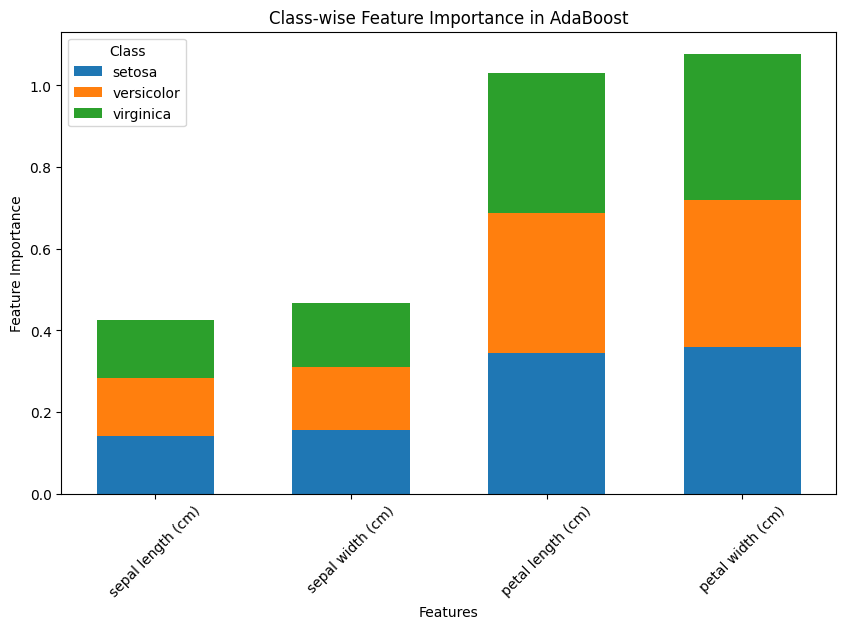

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = np.array(data.feature_names)
class_names = data.target_names  # Class labels

# Split dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90)

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=2)

# Define parameter grid
param_grid = {"n_estimators": [10, 50, 100]}

# GridSearchCV for best hyperparameter selection
grid = GridSearchCV(AdaBoostClassifier(estimator=base_estimator), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_y)

# Best classifier
classifier = grid.best_estimator_
print(classifier.estimator_params)

# Make predictions
predictions = classifier.predict(test_X)

# Print results
print(f"Best n_estimators: {grid.best_params_['n_estimators']}")
print(f"Accuracy: {accuracy_score(test_y, predictions)}")

# ---- Multi-Class Feature Importance ----
# Extract feature importances from all weak learners
n_classes = len(np.unique(y))
n_features = X.shape[1]

# Initialize an array to store feature importance per class
feature_importances_per_class = np.zeros((n_classes, n_features))

# Iterate over weak learners
for i, tree in enumerate(classifier.estimators_):
    tree_importance = tree.feature_importances_
    # print(tree_importance)

    # Assign the importance to the class it primarily affects
    affected_class = classifier.estimator_weights_[i]  # Estimator weight (amount of say)
    # feature_importances_per_class[int(i % n_classes)] += tree_importance * affected_class

    for j in range(n_classes):
      feature_importances_per_class[int(j % n_classes)] += tree_importance * affected_class
    print(tree_importance)
    print(affected_class)
    print(feature_importances_per_class)
    print("------------------------------------------------------------")


# Normalize importance per class
feature_importances_per_class /= feature_importances_per_class.sum(axis=1, keepdims=True)

# Plot feature importances per class
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6
x = np.arange(n_features)

# Plot stacked bar chart
bottom = np.zeros(n_features)
for class_idx in range(n_classes):
    ax.bar(x, feature_importances_per_class[class_idx], bar_width, label=class_names[class_idx], bottom=bottom)
    bottom += feature_importances_per_class[class_idx]

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=45)
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
ax.set_title("Class-wise Feature Importance in AdaBoost")
ax.legend(title="Class")
plt.show()


In [ ]:
np.zeros((n_classes, n_features))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

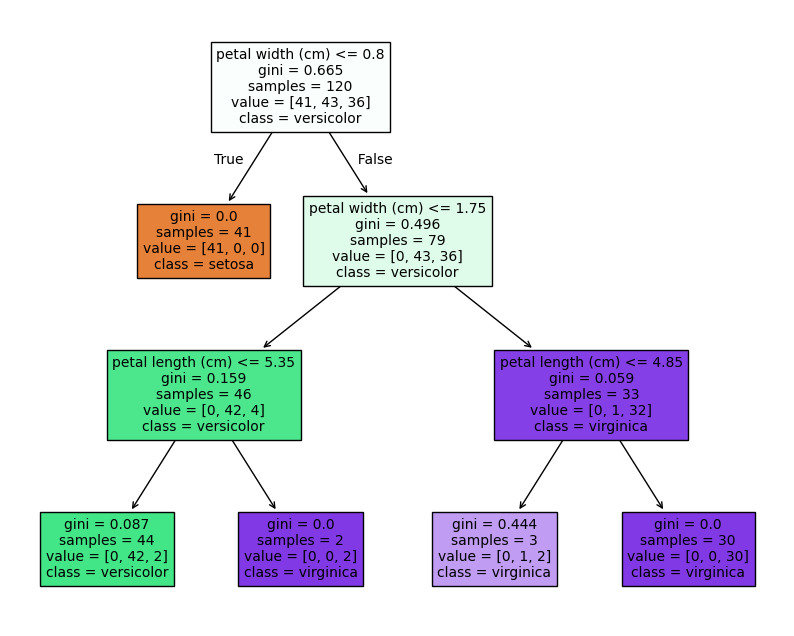

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train_X, train_y)
predictions = tree.predict(test_X)
accuracy_score(test_y, predictions)

plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

<BarContainer object of 4 artists>

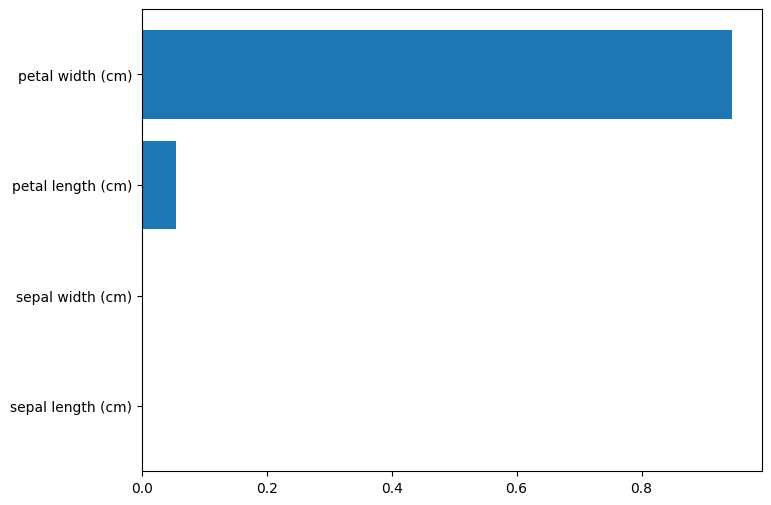

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(data.feature_names, tree.feature_importances_)

In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [18]:
base_estimator = DecisionTreeClassifier(max_depth=2)
param_grid = {"n_estimators":[10, 20, 30]}
skf = StratifiedKFold(n_splits=5, random_state=98, shuffle=True)

grid = GridSearchCV(AdaBoostClassifier(estimator = base_estimator), param_grid=param_grid, cv=skf, scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=98, shuffle=True),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid={'n_estimators': [10, 20, 30]}, scoring='accuracy')

In [19]:
grid.best_params_

{'n_estimators': 10}

In [21]:
grid.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=10)

In [22]:
accuracies = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)
for train_idx, test_idx in skf.split(X, y):
  train_X, test_X = X[train_idx], X[test_idx]
  train_y, test_y = y[train_idx], y[test_idx]

  classifier = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=2), n_estimators=20)
  classifier.fit(train_X, train_y)
  predictions = classifier.predict(test_X)
  acc = accuracy_score(test_y, predictions)
  accuracies.append(acc)

In [23]:
import numpy as np
print("Final Accuracy: {}".format(np.mean(accuracies)))

Final Accuracy: 0.9466666666666667


Next Question:
Modify the above code to:

Tune learning_rate in addition to n_estimators.
Try learning_rate values: [0.01, 0.1, 1.0].
Print the best n_estimators, learning_rate, and best accuracy.

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=20)

In [28]:
param_grid = {"n_estimators": [10, 50, 100],
              "learning_rate": [0.01, 0.1, 1]}
grid = GridSearchCV(AdaBoostClassifier(estimator = DecisionTreeClassifier()), param_grid=param_grid, cv=5, scoring="accuracy")
grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [30]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

Next Question:
Modify the above code to:

Use RandomizedSearchCV instead of GridSearchCV.
Set n_iter=10 to randomly sample 10 parameter combinations.
Print the best n_estimators, learning_rate, max_depth, algorithm, and best accuracy.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
param_grid = {"n_estimators": [10, 50, 100],
              "learning_rate": [0.01, 0.1, 1],
              "algorithm": ["SAMME", "SAMME.R"],
              "estimator__max_depth":[1, 2, 3]}

In [36]:
grid = RandomizedSearchCV(AdaBoostClassifier(estimator = DecisionTreeClassifier()), param_distributions=param_grid, n_iter=10, cv=skf, scoring="accuracy")


In [37]:
grid.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=9, shuffle=True),
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'estimator__max_depth': [1, 2, 3],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [10, 50, 100]},
                   scoring='accuracy')

In [38]:
grid.best_params_

{'n_estimators': 100,
 'learning_rate': 0.01,
 'estimator__max_depth': 1,
 'algorithm': 'SAMME'}